In [1]:
#Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for Preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array,array_to_img,load_img

#To unzip the data
import zipfile

#To display the image
from google.colab.patches import cv2_imshow

In [2]:
#unzip the data
path='/content/emotion.zip'
zip_object=zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()


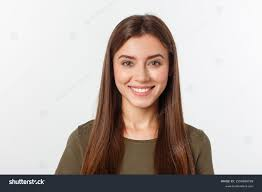

In [3]:
load_img('/content/emotion/training_set/happy/images (14).jpeg')

In [4]:
#Prepare the Training Dataset

training_generator=ImageDataGenerator(rescale=1/.255,
                                      rotation_range=7,
                                      horizontal_flip=True,
                                      zoom_range=0.2)

train_dataset=training_generator.flow_from_directory('/content/emotion/training_set',
                                                     target_size=(64,64),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                    )


Found 160 images belonging to 2 classes.


In [5]:
#Check index for each of the classes
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [7]:
#Prepare the Test Dataset
#Performing only Scaling

test_generator=ImageDataGenerator(rescale=1/.255,
                                  )

test_dataset=training_generator.flow_from_directory('/content/emotion/test_set',
                                                     target_size=(64,64),
                                                     batch_size=8,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                    )

Found 40 images belonging to 2 classes.


In [8]:
# Building the Model
# First CNN will be built, then the Flatten Layer after which the ANN takes in the output of the Flatten Layer


#Create the emotion model
network=Sequential()


#Layer1 with 32 Filters (each 3x3) and 1 MaxPool layer 2x2
network.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

#Layer2 with 32 Filters (each 3x3) and 1 MaxPool layer 2x2
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

#Layer3 with 32 Filters (each 3x3) and 1 MaxPool layer 2x2
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))


#Flatten
network.add(Flatten())

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [10]:
#Build the ANN Model
#Used softmax as we are solving a multi-class classification problem

network.add(Dense(units=1152,activation='relu'))
network.add(Dense(units=576,activation='relu'))

network.add(Dense(units=2,activation='softmax'))

In [11]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [12]:
#Compile the Model
#Used categorical_crossentropy as we are solving a multi-class classification problem
network.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
#Early Stopping
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy',patience=10,restore_best_weights=True)

In [14]:
#Executing the Model using fit_generator
history=network.fit_generator(train_dataset,epochs=100,validation_data=test_dataset)

Epoch 1/100


<ipython-input-14-336870cba5c7>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=network.fit_generator(train_dataset,epochs=100,validation_data=test_dataset)


20/20 [==============================] - 6s 41ms/step - loss: 27.5100 - accuracy: 0.5375 - val_loss: 1.2690 - val_accuracy: 0.4750
Epoch 2/100
20/20 [==============================] - 1s 31ms/step - loss: 0.8619 - accuracy: 0.5312 - val_loss: 0.7189 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 1s 49ms/step - loss: 0.6324 - accuracy: 0.5875 - val_loss: 0.8324 - val_accuracy: 0.5500
Epoch 4/100
20/20 [==============================] - 1s 47ms/step - loss: 0.6174 - accuracy: 0.6562 - val_loss: 0.7834 - val_accuracy: 0.5500
Epoch 5/100
20/20 [==============================] - 1s 30ms/step - loss: 0.5436 - accuracy: 0.7000 - val_loss: 0.9572 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 1s 37ms/step - loss: 0.5061 - accuracy: 0.7563 - val_loss: 0.7233 - val_accuracy: 0.7000
Epoch 7/100
20/20 [==============================] - 1s 30ms/step - loss: 0.5448 - accuracy: 0.7000 - val_loss: 0.9082 - val_accuracy: 0.6000
Epoch 8/100
20/20

In [15]:
#Predictions

predictions=network.predict(test_dataset)
predictions

5/5 [==============================] - 0s 30ms/step


array([[9.99998927e-01, 1.03901539e-06],
       [7.99159110e-01, 2.00840846e-01],
       [9.97399449e-01, 2.60061910e-03],
       [9.26330864e-01, 7.36691654e-02],
       [6.00769997e-01, 3.99230003e-01],
       [6.33074880e-01, 3.66925091e-01],
       [9.99578416e-01, 4.21621546e-04],
       [1.00000000e+00, 1.06220988e-09],
       [2.76273722e-03, 9.97237206e-01],
       [1.28241416e-04, 9.99871731e-01],
       [1.00000000e+00, 3.92347417e-08],
       [1.00000000e+00, 1.19102506e-11],
       [4.21435803e-01, 5.78564167e-01],
       [3.64645454e-03, 9.96353507e-01],
       [8.24367106e-01, 1.75632924e-01],
       [9.71023977e-01, 2.89760847e-02],
       [1.00000000e+00, 4.66397544e-36],
       [1.00000000e+00, 2.61147896e-12],
       [2.25286968e-02, 9.77471292e-01],
       [9.54694569e-01, 4.53054607e-02],
       [8.67198974e-24, 1.00000000e+00],
       [3.51960808e-01, 6.48039162e-01],
       [9.99999881e-01, 9.38800611e-08],
       [9.99999285e-01, 7.59075590e-07],
       [2.084153

In [16]:
predictions=np.argmax(predictions,axis=1)

In [17]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [18]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<Axes: >

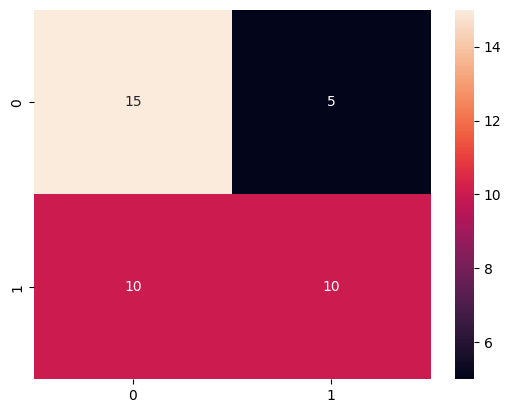

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        20
           1       0.67      0.50      0.57        20

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.62        40
weighted avg       0.63      0.62      0.62        40



In [21]:
#Save the model
network.save('emotion_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
#Load the Model
from tensorflow.keras.models import load_model
loaded_model=load_model('/content/emotion_cnn_model.h5')

In [23]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [50]:
#classifying an image

import cv2
image=cv2.imread('/content/emotion/test_set/happy/png-transparent-graphy-happy-woman-face-hand-photography.png')

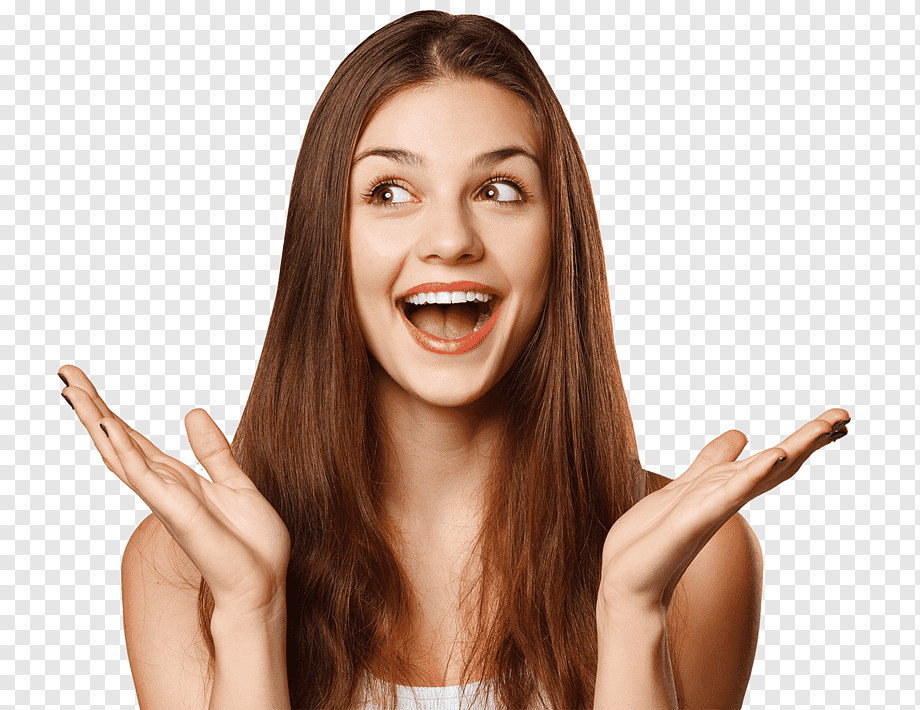

In [51]:
cv2_imshow(image)

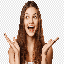

In [52]:
#Since model takes only 64x64, we need to resize first and then import for classification
# We can use image generator as well here

image=cv2.resize(image,(64,64))
cv2_imshow(image)

array([[[255, 255, 255],
        [230, 230, 230],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [230, 230, 230],
        [255, 255, 255]],

       [[230, 230, 230],
        [255, 255, 255],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [255, 255, 255],
        [230, 230, 230]],

       [[230, 230, 230],
        [255, 255, 255],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [255, 255, 255],
        [230, 230, 230]],

       ...,

       [[230, 230, 230],
        [255, 255, 255],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [255, 255, 255],
        [230, 230, 230]],

       [[255, 255, 255],
        [230, 230, 230],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [230, 230, 230],
        [255, 255, 255]],

       [[255, 255, 255],
        [230, 230, 230],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [230, 230, 230],
        [255, 255, 255]]], dtype=uint8)
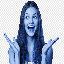

In [53]:
image

In [54]:
#To add batch(no of images) to the image shape,
image=image.reshape(-1,64,64,3)

image.shape

(1, 64, 64, 3)

In [55]:
#Prediction of new image
#We are getting probabilities so we need touse argmax to get the right output
result=loaded_model(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.97747976, 0.02252026]], dtype=float32)>

In [56]:
result=np.argmax(result)
result

0

In [57]:
if result==0:
  print('happy')
else:
  print('sad')

happy
